# import naccesary librery

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data

In [4]:
df=pd.read_csv(rf"C:\Users\dhama\OneDrive\Desktop\bank\bank_data.csv")
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [5]:
df.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [6]:
df.shape

(1882, 6)

In [7]:
df.dtypes

id                            int64
expected_recovery_amount      int64
actual_recovery_amount      float64
recovery_strategy            object
age                           int64
sex                          object
dtype: object

In [8]:
df.isna().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

<Axes: >

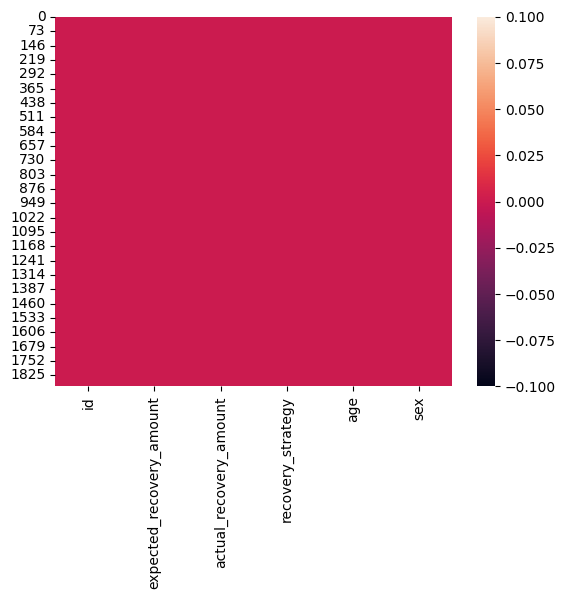

In [9]:
sns.heatmap(df.isna())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [11]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [12]:
df.describe(include=object)

,recovery_strategy,sex
count,1882,1882
unique,5,2
top,Level 1 Recovery,Male
freq,670,973


# chek outlier
### lets find max and min of the data


In [13]:
df.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [14]:
mx=df["actual_recovery_amount"].max()
mn=df["actual_recovery_amount"].min()
print(mx)
print(mn)

34398.47971
200.425



we will use this later in finding outlier
# lower extreme and Upper extreme
### Outlier are data points that are more extreme then  Q1-105*IQR OR Q3+1.5*IQR
#### LOWER EXTREME : Q1-1.5*IQR
#### UPPER EXTREME : Q3+1.5*IQR

## Lates find   Q1 and Q3
#### To find lower extere , we must find Q1 and Q3. We will use percentile mathod of numpy to calculate quartiles.

In [15]:
q1,q3=np.percentile(df["actual_recovery_amount"],[25,75])
print(q1,q3)

1045.1903002499998 5417.23720675


## lets find inter quartile range(IQR)

In [16]:
iqr=q3-q1
iqr

4372.0469065

## lets find lower extreme and upper extreme

In [17]:
lx=q1-1.5*iqr
ux=q3+1.5*iqr
print("lower extreme :",lx)
print("upper extreme :",ux)

lower extreme : -5512.880059499999
upper extreme : 11975.3075665


##NO OUTLIER

In [18]:
ndf=df.loc[(df["actual_recovery_amount"]>lx) & (df["actual_recovery_amount"]<ux)]
ndf

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1838,588,8620,9668.229463,Level 4 Recovery,82,Female
1844,581,8768,9839.572021,Level 4 Recovery,70,Female
1846,1860,8789,11422.411980,Level 4 Recovery,54,Male
1863,186,9290,10351.154260,Level 4 Recovery,55,Female


# create age range

In [19]:
ndf["age"].min()

18

In [20]:
s=ndf["age"].max()
s

84

In [21]:
odf=list(range(0,int(s),10))
odf

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [22]:
def age_range(age):
    if(age<=10):
        return '0-10'
    elif(age<=20):
        return '10-20'
    elif(age<=30):
        return '20-30'
    elif(age<=40):
        return '30-40'
    elif(age<=50):
        return '40-50'
    elif(age<=60):
        return '50-60'
    elif(age<=70):
        return '60-70'
    elif(age<=80):
        return '70-80'
    else:
        return '80-above'
    
ndf['age_range'] = ndf['age'].apply(age_range)
ndf

C:\Users\dhama\AppData\Local\Temp\ipykernel_18548\3923746155.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['age_range'] = ndf['age'].apply(age_range)


,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.540000,Level 0 Recovery,19,Male,10-20
1,1150,486,416.090000,Level 0 Recovery,25,Female,20-30
2,380,527,429.350000,Level 0 Recovery,27,Male,20-30
3,1838,536,296.990000,Level 0 Recovery,25,Male,20-30
4,1995,541,346.385000,Level 0 Recovery,34,Male,30-40
...,...,...,...,...,...,...,...
1838,588,8620,9668.229463,Level 4 Recovery,82,Female,80-above
1844,581,8768,9839.572021,Level 4 Recovery,70,Female,60-70
1846,1860,8789,11422.411980,Level 4 Recovery,54,Male,50-60
1863,186,9290,10351.154260,Level 4 Recovery,55,Female,50-60


df["age_range"].value_counts

In [23]:
ac=ndf["age_range"].value_counts()
ac=pd.DataFrame(ac)
ac=ac.reset_index()
ac

,age_range,count
0,30-40,523
1,20-30,520
2,40-50,266
3,50-60,173
4,10-20,108
5,60-70,94
6,70-80,55
7,80-above,13


## Counting AGE Range

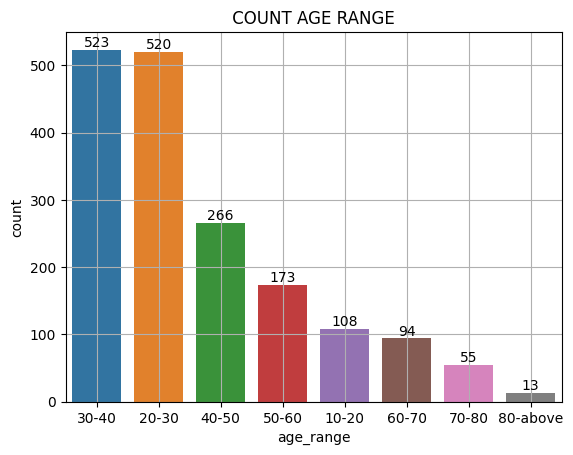

In [24]:
ax=sns.barplot(x=ac["age_range"],y=ac["count"])
ax.bar_label(ax.containers[0])
plt.grid()
plt.title(" COUNT AGE RANGE ")
plt.show()

## Count Mail and Femail

In [25]:
ndf.head(2)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.54,Level 0 Recovery,19,Male,10-20
1,1150,486,416.09,Level 0 Recovery,25,Female,20-30


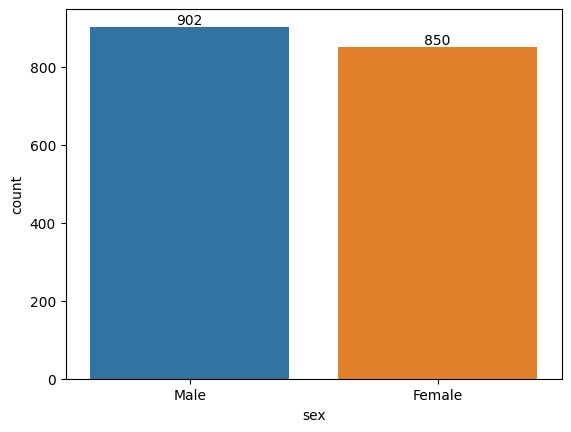

In [26]:
vc=ndf["sex"].value_counts()
vc=vc.reset_index()
vc=sns.barplot(x=vc["sex"],y=vc["count"])
vc.bar_label(vc.containers[0])
plt.show()

#

# Count recovery strategy

In [27]:
ndf.head(2)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.54,Level 0 Recovery,19,Male,10-20
1,1150,486,416.09,Level 0 Recovery,25,Female,20-30


In [31]:
c2=ndf["recovery_strategy"].value_counts()
c2=pd.DataFrame(c2)
c2=c2.reset_index()
c2

,recovery_strategy,count
0,Level 1 Recovery,670
1,Level 3 Recovery,357
2,Level 2 Recovery,333
3,Level 0 Recovery,247
4,Level 4 Recovery,145


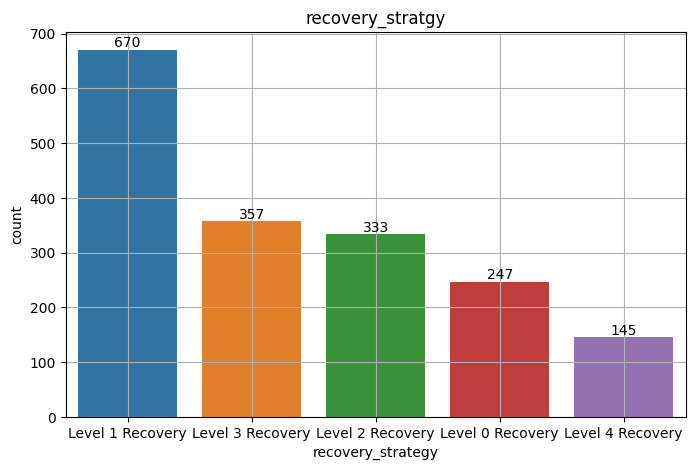

In [32]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=c2["recovery_strategy"],y=c2["count"])
ax.bar_label(ax.containers[0])
plt.title("recovery_stratgy")
plt.grid()
plt.show()

# Relation between expected_recovery_amaount and actual_recovery_amount

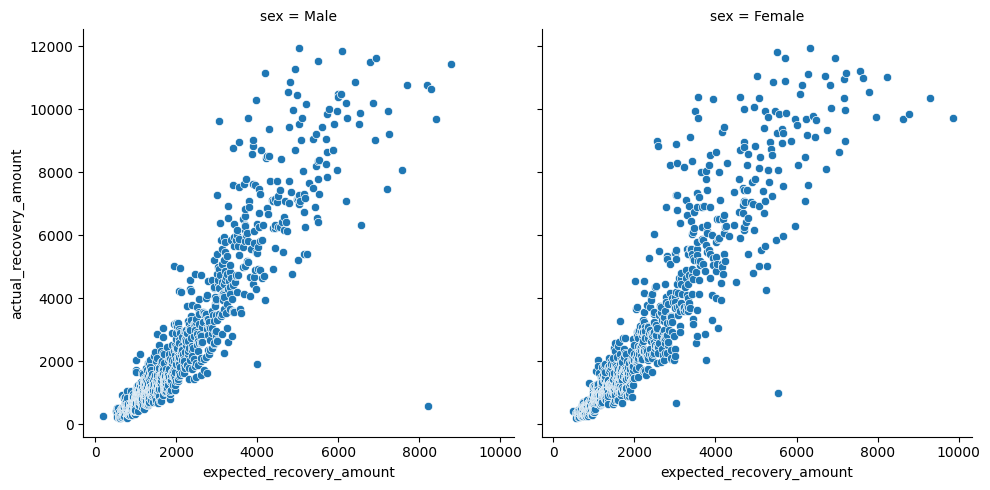

In [33]:
sns.relplot(data=ndf,x="expected_recovery_amount",y="actual_recovery_amount",col="sex")
plt.show()

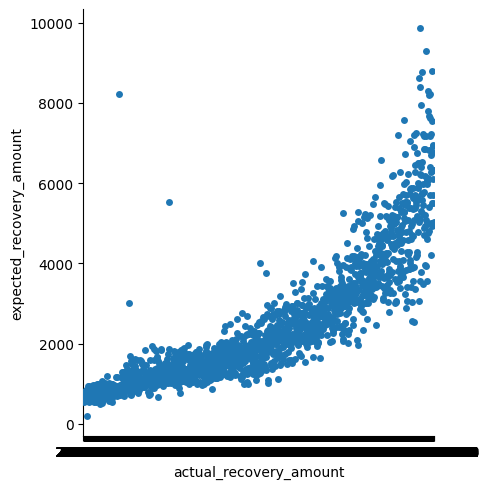

In [37]:
sns.catplot(x="actual_recovery_amount",y="expected_recovery_amount",data=ndf)
plt.show()

In [38]:
ndf

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.540000,Level 0 Recovery,19,Male,10-20
1,1150,486,416.090000,Level 0 Recovery,25,Female,20-30
2,380,527,429.350000,Level 0 Recovery,27,Male,20-30
3,1838,536,296.990000,Level 0 Recovery,25,Male,20-30
4,1995,541,346.385000,Level 0 Recovery,34,Male,30-40
...,...,...,...,...,...,...,...
1838,588,8620,9668.229463,Level 4 Recovery,82,Female,80-above
1844,581,8768,9839.572021,Level 4 Recovery,70,Female,60-70
1846,1860,8789,11422.411980,Level 4 Recovery,54,Male,50-60
1863,186,9290,10351.154260,Level 4 Recovery,55,Female,50-60


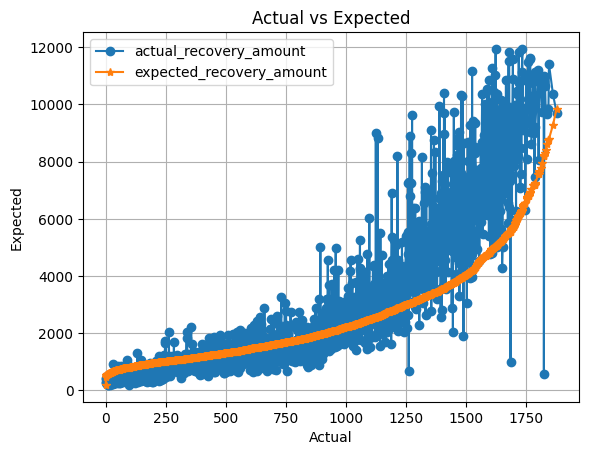

In [39]:
data1 =ndf['actual_recovery_amount']
data2 =ndf['expected_recovery_amount']
plt.plot(data1,marker='o',label="actual_recovery_amount")
plt.plot(data2,marker='*',label='expected_recovery_amount')
plt.title('Actual vs Expected')
plt.xlabel('Actual')
plt.ylabel('Expected')
plt.legend()
plt.grid()
plt.show()

## recovery strategy wise total actual recovery amount

In [40]:
ndf.head(2)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.54,Level 0 Recovery,19,Male,10-20
1,1150,486,416.09,Level 0 Recovery,25,Female,20-30


In [41]:
pdf = ndf.groupby('recovery_strategy').agg(
maximum_actual_recovery_amount=('actual_recovery_amount','sum'))
pdf=pdf.reset_index().sort_values(by='maximum_actual_recovery_amount',ascending=False)
pdf

,recovery_strategy,maximum_actual_recovery_amount
3,Level 3 Recovery,2.091710e+06
4,Level 4 Recovery,1.277391e+06
2,Level 2 Recovery,9.713328e+05
1,Level 1 Recovery,8.721319e+05
0,Level 0 Recovery,1.286937e+05


## Sexwise total average actual recovery amount

In [42]:
ndf.head(2)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.54,Level 0 Recovery,19,Male,10-20
1,1150,486,416.09,Level 0 Recovery,25,Female,20-30


In [43]:
pdf = ndf.groupby('sex').agg(
total_actual_recovery_amt=('actual_recovery_amount','sum')
)
pdf=pdf.reset_index().sort_values(by='total_actual_recovery_amt',ascending=False)
pdf

,sex,total_actual_recovery_amt
0,Female,2.725188e+06
1,Male,2.616071e+06


## recovery_strategy with sex

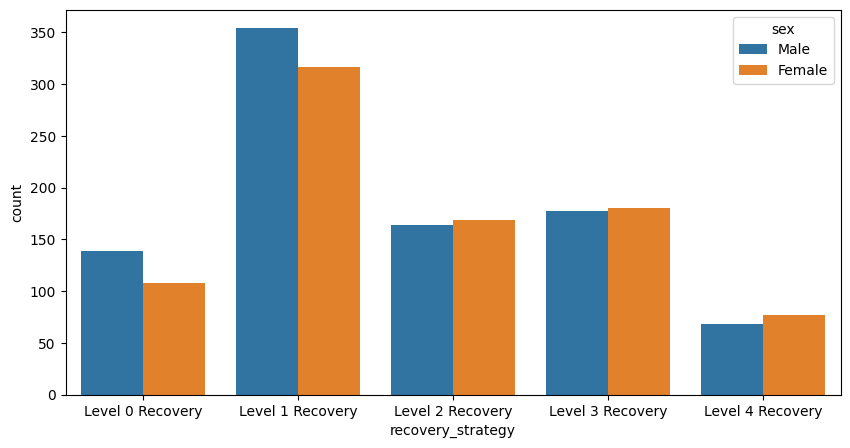

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data=ndf,x='recovery_strategy',hue='sex')
plt.show()

Count plot compares the distribution of recovery strategies based on gender

## Expected recovery amount with sex

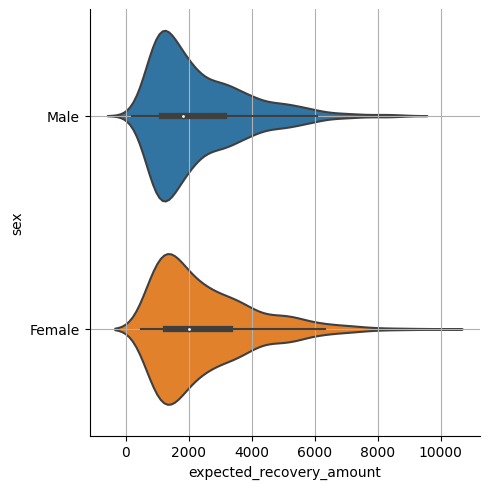

In [45]:
sns.catplot(x='expected_recovery_amount',y='sex',data=ndf,kind='violin')
plt.grid()
plt.show()

Violin plot shows expected recovery amounts' distribution for males and females, highlighting gender differences.

# age vs. expected recovery amount

In [46]:
ndf.head(2)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.54,Level 0 Recovery,19,Male,10-20
1,1150,486,416.09,Level 0 Recovery,25,Female,20-30


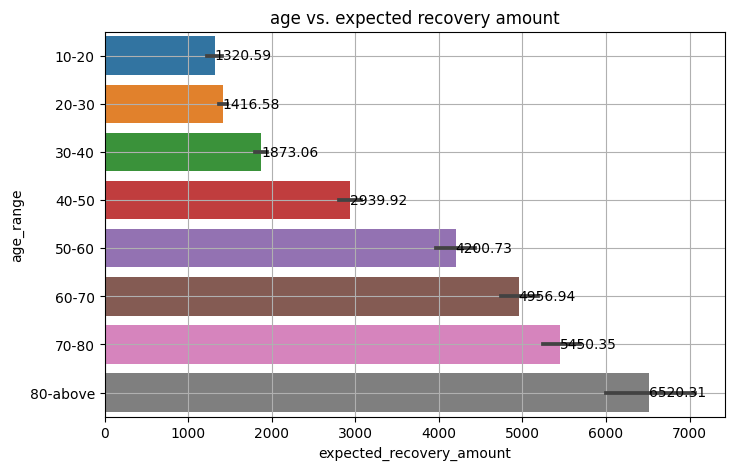

In [47]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=ndf['expected_recovery_amount'],y=ndf['age_range'])
ax.bar_label(ax.containers[0])
plt.title('age vs. expected recovery amount')
plt.grid()
plt.show()

The data covers a relatively old age group (80-above), indicating that these recovery cases involve oldest individual

# age vs. actual recovery amount

In [48]:
ndf.head(2)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.54,Level 0 Recovery,19,Male,10-20
1,1150,486,416.09,Level 0 Recovery,25,Female,20-30


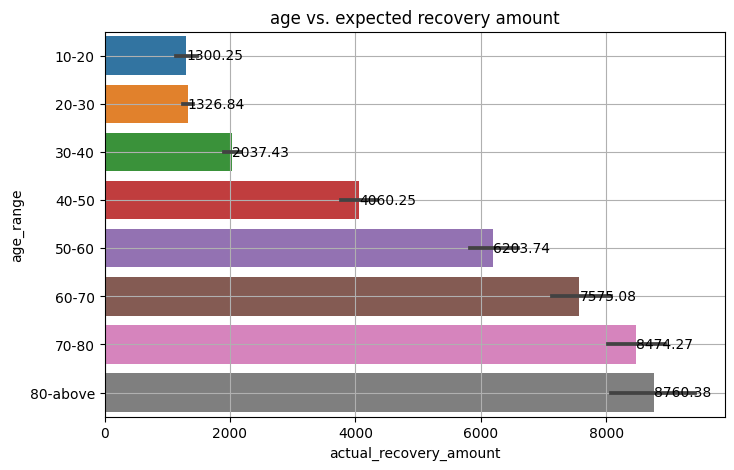

In [49]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=ndf['actual_recovery_amount'],y=ndf['age_range'])
ax.bar_label(ax.containers[0])
plt.title('age vs. expected recovery amount')
plt.grid()
plt.show()

The data covers a relatively old age group (80-above), indicating that these recovery cases involve oldest individual

# sex vs. expected recovery amount

In [50]:
ndf.head(2)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.54,Level 0 Recovery,19,Male,10-20
1,1150,486,416.09,Level 0 Recovery,25,Female,20-30


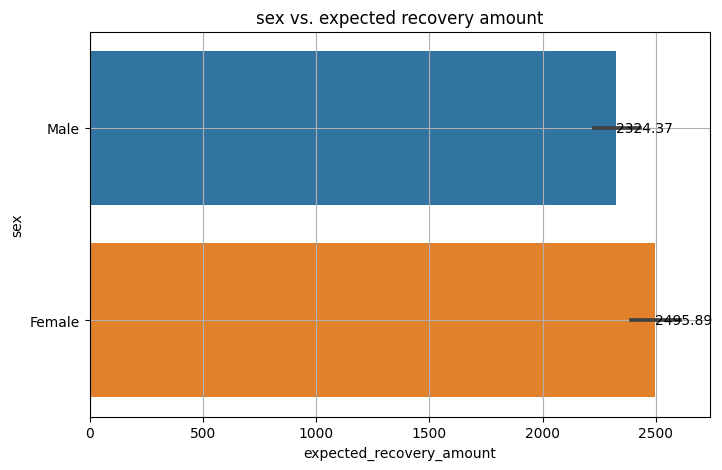

In [51]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=ndf['expected_recovery_amount'],y=ndf['sex'])
ax.bar_label(ax.containers[0])
plt.title('sex vs. expected recovery amount')
plt.grid()
plt.show()

# sex vs. actual recovery amount

In [52]:
ndf.head(2)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,2030,194,263.54,Level 0 Recovery,19,Male,10-20
1,1150,486,416.09,Level 0 Recovery,25,Female,20-30


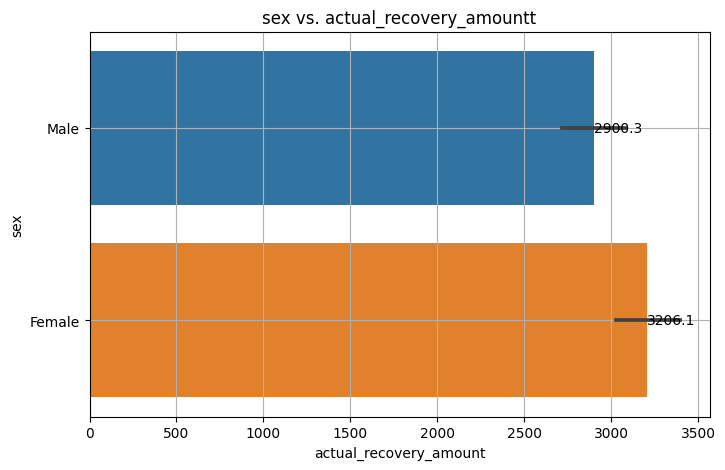

In [53]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=ndf['actual_recovery_amount'],y=ndf['sex'])
ax.bar_label(ax.containers[0])
plt.title('sex vs. actual_recovery_amountt')
plt.grid()
plt.show()

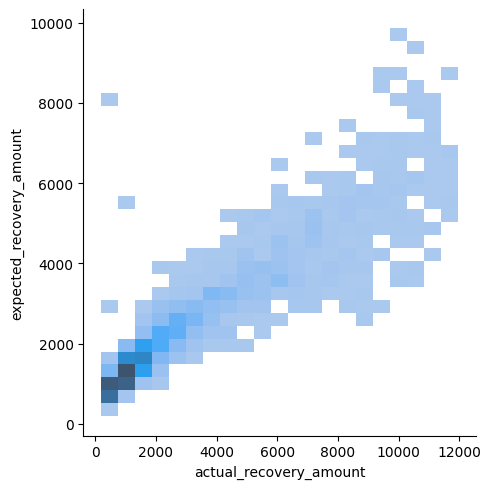

In [54]:
sns.displot(x=ndf['actual_recovery_amount'],y=ndf['expected_recovery_amount'],data=ndf)

# Conclusion :
 ## Certainly! The data reveals intriguing patterns in recovery outcomes, showcasing the impact of age and gender on the effectiveness of different recovery strategies. These findings underscore the significance of tailored approaches for diverse demographic groups, potentially leading to more impressive recovery results with targeted interventions.